# Сергеев М.Ю. ИУ5-63Б

# Научно исследовательская работа студента по дисциплине: "Технологии машинного обучения".

# Анализ данных.

В качестве набора данных мы будем использовать набор данных 
для банка - https://www.kaggle.com/datasets/nextbigwhat/analytics-vidhya-job-a-thon-may-2021

Эта задача является очень актуальной для банковской системы.

Датасет состоит из двух файлов:
- train_s3TEQDk.csv - обучающая выборка
- test_mSzZ8RL.csv - тестовая выборка

Каждый файл содержит следующие колонки:
- ID - Уникальный идентификатор строки.
- Gender - Пол клиента.
- Age - Возраст клиента (в годах).
- Region_Code - Код региона для клиентов.
- Occupation - Род занятий для клиента.
- Channel_Code - Код канала приобретения для клиента (закодированный)
- Vintage - Винтаж для клиента (в месяцах).
- Credit_Product - Есть ли у Клиента есть какой-либо активный кредитный продукт (Жилищный кредит, Персональный кредит, Кредитная карта и т.д.
- AvgAccountBalance  - Средний остаток на счете Клиента за последние 12 месяцев.
- Is_Active - был ли клиент активен за последние 3 месяца.
- Is_lead - целевой признак датасета. Если Клиент заинтересован в кредитной карте то 1 иначе 0.

В данной задаче будем решать задачу классификации:
- Для решения **задачи классификации** в качестве целевого признака будем использовать "Is_lead". Поскольку признак содержит только значения 0 и 1, то это задача бинарной классификации.

### Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первых ячейках ноутбука.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

Загрузим файлы датасета с помощью библиотеки Pandas. 

Часто в файлах формата CSV в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [2]:
# Обучающая выборка
original_train = pd.read_csv('C:/Users/maxim/OneDrive/Рабочий стол/ТМО/archive/train_s3TEQDk.csv', sep=",")
# Тестовая выборка
original_test = pd.read_csv('C:/Users/maxim/OneDrive/Рабочий стол/ТМО/archive/test_mSzZ8RL.csv', sep=",")

In [3]:
# Удалим дубликаты записей, если они присутствуют
train = original_train.drop_duplicates()
test = original_test.drop_duplicates()

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

### Основные характеристики датасетов

In [4]:
# Первые 5 строк датасета
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
# Размер обучающего датасета - 245725 строк, 11 колонок
train.shape, test.shape

((245725, 11), (105312, 10))

In [7]:
# Список колонок
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [8]:
# Список колонок с типами данных 
# убедимся что типы данных одинаковы в обучающей и тестовых выборках
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [9]:
test.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [10]:
# Проверим наличие пустых значений
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [12]:
#Заполним пропуски 'No'
train=train.fillna('No')

In [13]:
test=test.fillna('No')

In [14]:
#Удалим ненужный столбец
train=train.drop(columns=['ID'], axis=1)
test=test.drop(columns=['ID'], axis=1)

In [15]:
#Произведем кодировку категориальных признаков
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [16]:
train_oe = train[['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']]

In [17]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
train_filled = imp.fit_transform(train_oe)
train_filled

array([['Female', 'RG268', 'Other', 'X3', 'No', 'No'],
       ['Female', 'RG277', 'Salaried', 'X1', 'No', 'No'],
       ['Female', 'RG268', 'Self_Employed', 'X3', 'No', 'Yes'],
       ...,
       ['Female', 'RG281', 'Salaried', 'X1', 'No', 'No'],
       ['Female', 'RG273', 'Salaried', 'X1', 'No', 'No'],
       ['Male', 'RG269', 'Salaried', 'X1', 'No', 'No']], dtype=object)

In [18]:
oe = OrdinalEncoder(dtype='int64')
cat_enc_oe = oe.fit_transform(train_filled)
cat_enc_oe

array([[ 0, 18,  1,  2,  0,  0],
       [ 0, 27,  2,  0,  0,  0],
       [ 0, 18,  3,  2,  0,  1],
       ...,
       [ 0, 31,  2,  0,  0,  0],
       [ 0, 23,  2,  0,  0,  0],
       [ 1, 19,  2,  0,  0,  0]], dtype=int64)

In [19]:
df = pd.DataFrame(cat_enc_oe, columns =['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'])

In [20]:
train_int = train[['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']]
train=train_int.join(df)
train

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,73,43,1045696,0,0,18,1,2,0,0
1,30,32,581988,0,0,27,2,0,0,0
2,56,26,1484315,0,0,18,3,2,0,1
3,34,19,470454,0,1,20,2,0,0,0
4,30,33,886787,0,0,32,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
245720,51,109,1925586,0,1,34,3,2,0,0
245721,27,15,862952,0,1,18,2,0,0,1
245722,26,13,670659,0,0,31,2,0,0,0
245723,28,31,407504,0,0,23,2,0,0,0


In [21]:
test_oe = test[['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']]

In [22]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
test_filled = imp.fit_transform(test_oe)
test_filled

array([['Male', 'RG254', 'Other', 'X1', 'Yes', 'No'],
       ['Male', 'RG268', 'Other', 'X2', 'No', 'No'],
       ['Male', 'RG270', 'Salaried', 'X1', 'No', 'No'],
       ...,
       ['Male', 'RG254', 'Salaried', 'X4', 'No', 'No'],
       ['Male', 'RG254', 'Other', 'X3', 'No', 'Yes'],
       ['Male', 'RG256', 'Salaried', 'X1', 'No', 'No']], dtype=object)

In [23]:
oe = OrdinalEncoder(dtype='int64')
cat_enc_oe = oe.fit_transform(test_filled)
cat_enc_oe

array([[ 1,  4,  1,  0,  1,  0],
       [ 1, 18,  1,  1,  0,  0],
       [ 1, 20,  2,  0,  0,  0],
       ...,
       [ 1,  4,  2,  3,  0,  0],
       [ 1,  4,  1,  2,  0,  1],
       [ 1,  6,  2,  0,  0,  0]], dtype=int64)

In [24]:
df = pd.DataFrame(cat_enc_oe, columns =['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'])

In [25]:
test_int = test[['Age', 'Vintage', 'Avg_Account_Balance']]
test=test_int.join(df)
test

,Age,Vintage,Avg_Account_Balance,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,29,25,742366,1,4,1,0,1,0
1,43,49,925537,1,18,1,1,0,0
2,31,14,215949,1,20,2,0,0,0
3,29,33,868070,1,22,1,0,0,0
4,29,19,657087,0,20,1,0,0,0
...,...,...,...,...,...,...,...,...,...
105307,52,86,4242558,1,18,2,1,1,1
105308,55,86,1159153,1,27,1,1,1,0
105309,35,15,1703727,1,4,2,3,0,0
105310,53,93,737178,1,4,1,2,0,1


**Вывод. Мы избавились от пропусков, убрали ненужные столбцы и закодировали котигориальные признаки.**

### Построение графиков для понимания структуры данных

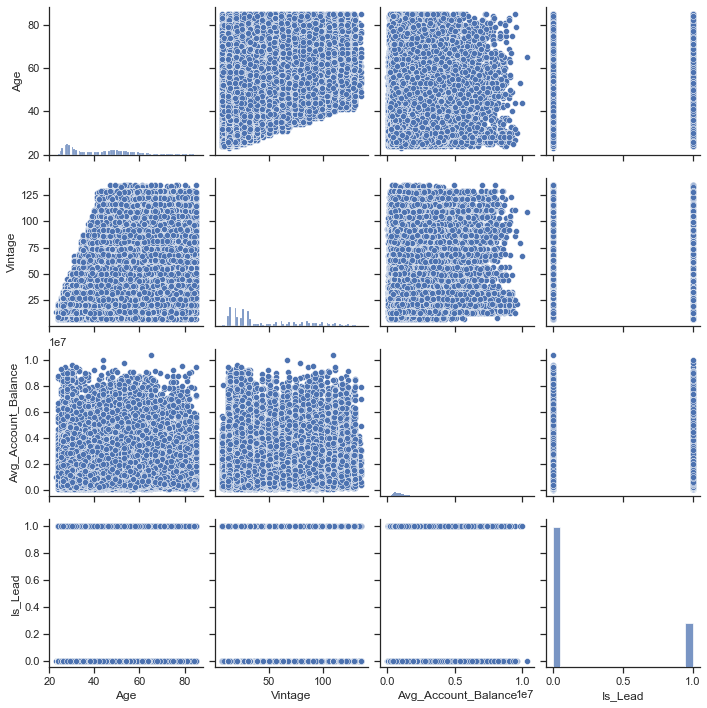

In [26]:
# Парные диаграммы
sns.pairplot(train_int)

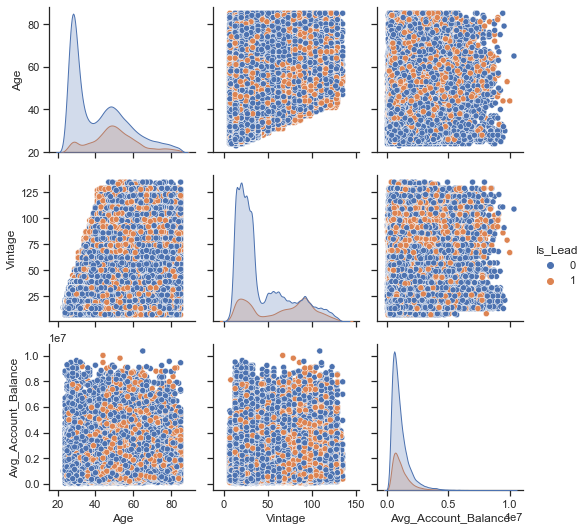

In [27]:
sns.pairplot(train_int, hue="Is_Lead")

In [28]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
train['Is_Lead'].unique()

array([0, 1], dtype=int64)

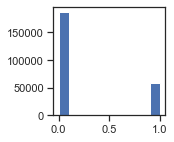

In [29]:
# Оценим дисбаланс классов для Is_Lead
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['Is_Lead'])
plt.show()

In [30]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [31]:
# посчитаем дисбаланс классов
total = train.shape[0]
class_0, class_1 = train['Is_Lead'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 76.28%, а класс 1 составляет 23.72%.


**Вывод. Дисбаланс классов присутствует, но является приемлемым.**

In [32]:
train.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead', 'Gender',
       'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

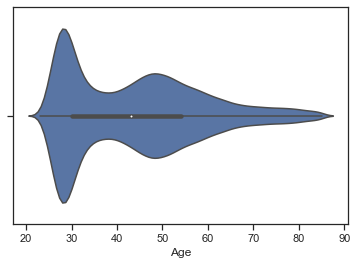

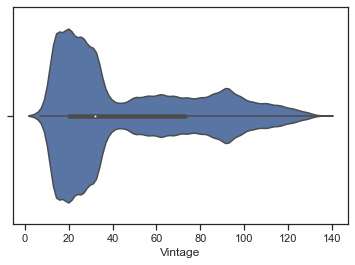

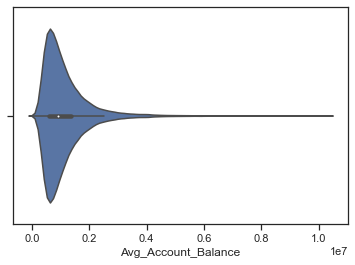

In [33]:
# Скрипичные диаграммы для числовых колонок
for col in ['Age', 'Vintage', 'Avg_Account_Balance']:
    sns.violinplot(x=train[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [34]:
train.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
Gender                 int64
Region_Code            int64
Occupation             int64
Channel_Code           int64
Credit_Product         int64
Is_Active              int64
dtype: object

Категориальные признаки уже закодированы. Исключением является признак Is_Lead, но в представленном датасете  он уже закодирован на основе подхода LabelEncoding.

Выполним масштабирование данных.

In [35]:
# Числовые колонки для масштабирования
scale_cols = ['Age', 'Vintage', 'Avg_Account_Balance', 'Region_Code', 'Occupation', 'Channel_Code']

In [36]:
train_all=train

In [37]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(train[scale_cols])

In [38]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    train[new_col_name] = sc1_data[:,i]

In [39]:
train_all.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Age_scaled,Vintage_scaled,Avg_Account_Balance_scaled,Region_Code_scaled,Occupation_scaled,Channel_Code_scaled
0,73,43,1045696,0,0,18,1,2,0,0,0.806452,0.281250,0.099205,0.529412,0.333333,0.666667
1,30,32,581988,0,0,27,2,0,0,0,0.112903,0.195312,0.054321,0.794118,0.666667,0.000000
2,56,26,1484315,0,0,18,3,2,0,1,0.532258,0.148438,0.141660,0.529412,1.000000,0.666667
3,34,19,470454,0,1,20,2,0,0,0,0.177419,0.093750,0.043525,0.588235,0.666667,0.000000
4,30,33,886787,0,0,32,2,0,0,0,0.112903,0.203125,0.083823,0.941176,0.666667,0.000000


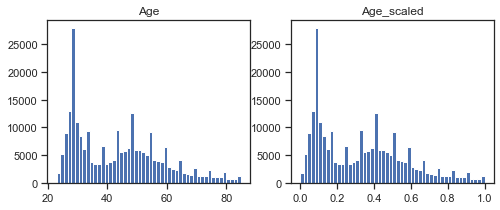

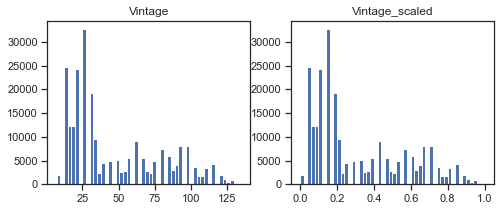

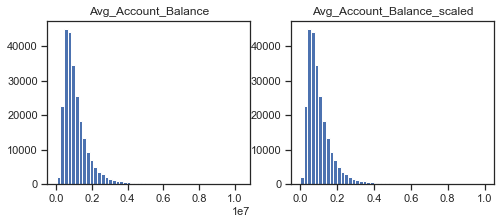

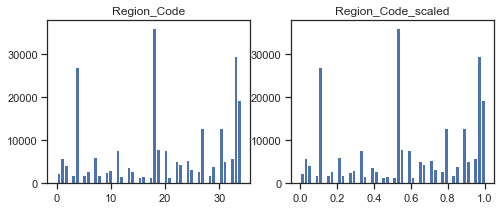

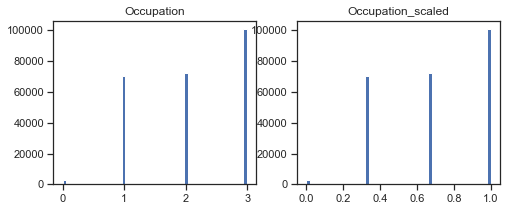

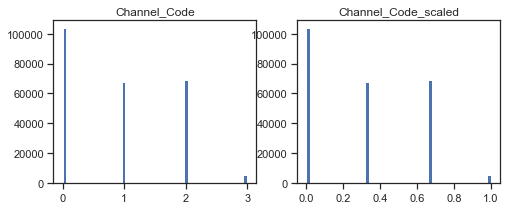

In [40]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(train_all[col], 50)
    ax[1].hist(train_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [41]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols + ['Is_Lead', 'Gender', 'Credit_Product', 'Is_Active']
corr_cols_1

['Age',
 'Vintage',
 'Avg_Account_Balance',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Is_Lead',
 'Gender',
 'Credit_Product',
 'Is_Active']

In [42]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['Is_Lead', 'Gender', 'Credit_Product', 'Is_Active']
corr_cols_2

['Age_scaled',
 'Vintage_scaled',
 'Avg_Account_Balance_scaled',
 'Region_Code_scaled',
 'Occupation_scaled',
 'Channel_Code_scaled',
 'Is_Lead',
 'Gender',
 'Credit_Product',
 'Is_Active']

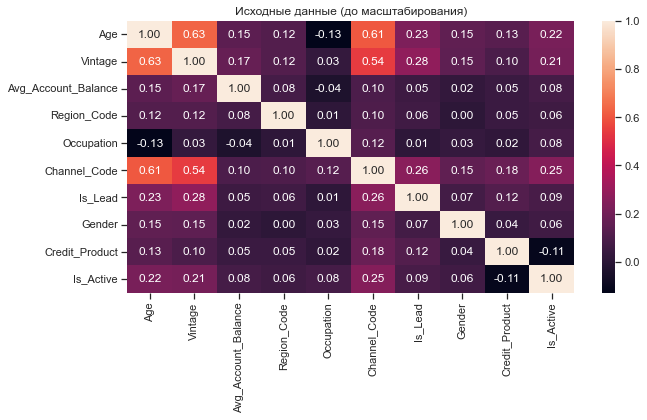

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(train_all[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

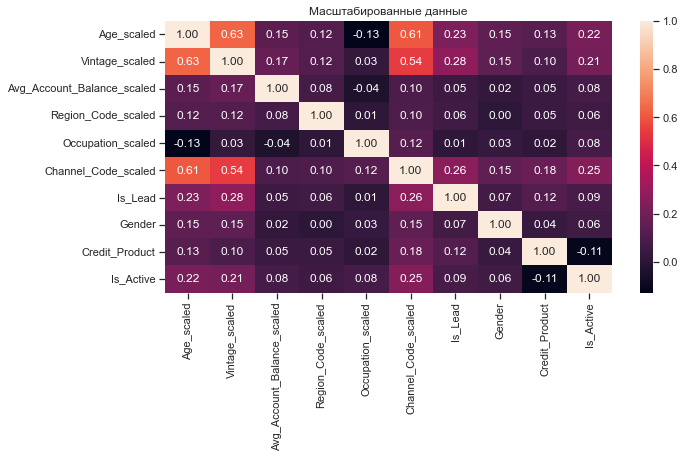

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(train_all[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак классификации "Is_Lead" наиболее сильно коррелирует с Vintage (0.28), возрастом (0.23) и Channel_Code (0.26). Эти признаки обязательно следует оставить в модели классификации.
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком.  На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения. 

## Выбор метрик для последующей оценки качества моделей. 

### В качестве метрик для решения задачи классификации  будем использовать:

Метрики, формируемые на основе матрицы ошибок:

#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### Метрика $F_1$-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

#### Метрика ROC AUC

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [45]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [46]:
# На основе масштабированных данных выделим 
# обучающую и тестовую выборки с помощью фильтра
train_all_part=train_all.head(50000)
train_data_all, test_data_all = train_test_split(train_all_part,test_size=0.2)
train_data_all.shape, test_data_all.shape

((40000, 16), (10000, 16))

In [47]:
# Признаки для задачи классификации
task_clas_cols = ['Age_scaled', 'Vintage_scaled', 'Channel_Code_scaled', 'Avg_Account_Balance_scaled',
                  'Region_Code_scaled', 'Gender', 'Occupation_scaled', 'Credit_Product', 'Is_Active']

In [48]:
# Выборки для задачи классификации
clas_X_train = train_data_all[task_clas_cols]
clas_X_test = test_data_all[task_clas_cols]
clas_Y_train = train_data_all['Is_Lead']
clas_Y_test = test_data_all['Is_Lead']
clas_X_train.shape, clas_X_test.shape, clas_Y_train.shape, clas_Y_test.shape

((40000, 9), (10000, 9), (40000,), (10000,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

### Решение задачи классификации

In [49]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [50]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [51]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [52]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)
    # Предсказание значений
    Y_pred = model.predict(clas_X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(clas_X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(clas_Y_test.values, Y_pred)
    recall = recall_score(clas_Y_test.values, Y_pred)
    f1 = f1_score(clas_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(clas_Y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, clas_X_test, clas_Y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

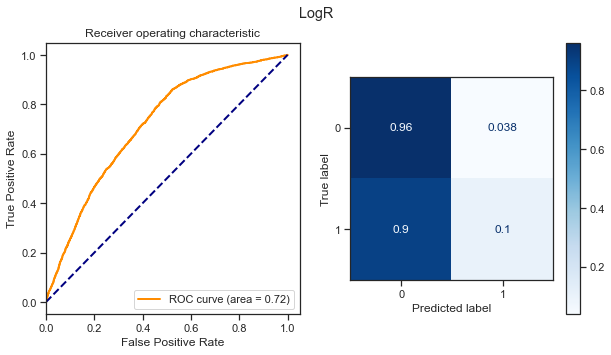

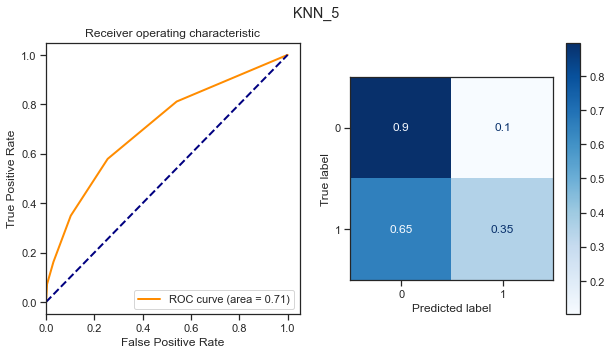

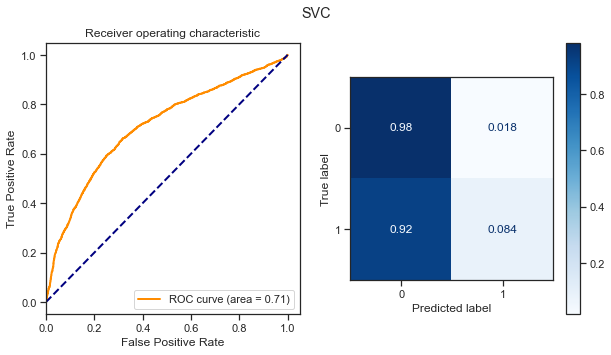

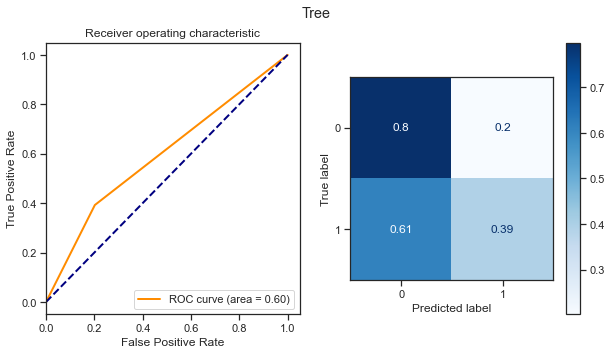

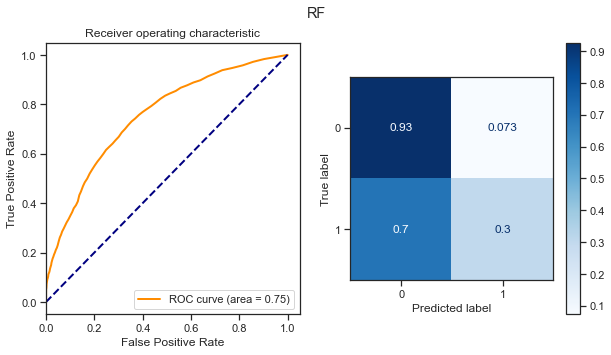

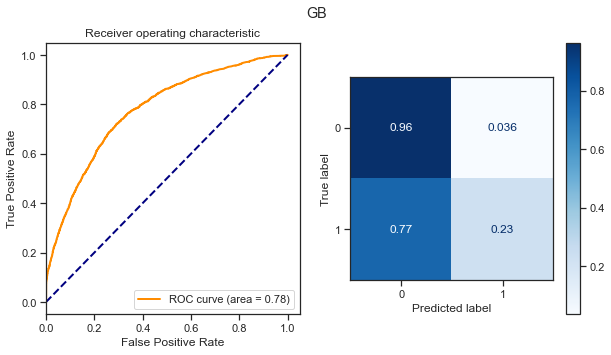

In [53]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Подбор гиперпараметров для выбранных моделей.

### Задача классификации

In [54]:
clas_X_train.shape

(40000, 9)

In [55]:
n_range_list = list(range(0,1250,50))
n_range_list[0] = 1

In [56]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
          550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
         1100, 1150, 1200])}]

In [57]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(clas_X_train, clas_Y_train)

Wall time: 9min 8s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([   1,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200])}],
             scoring='roc_auc')

In [58]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=50)

In [59]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 50}

In [60]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'50'

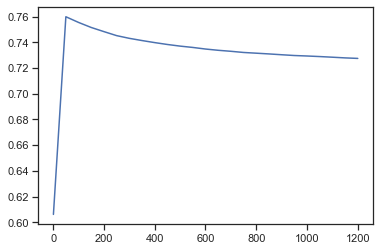

In [61]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Повторение для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

### Решение задачи классификации

In [62]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

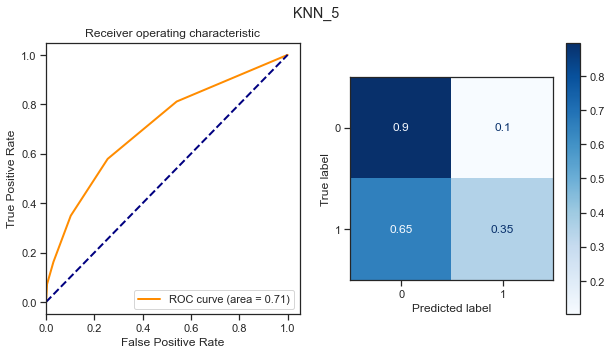

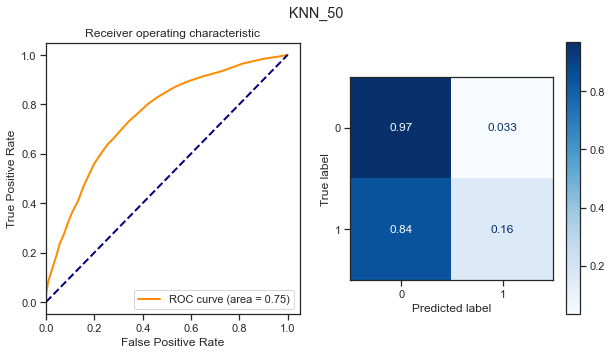

In [63]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Формирование выводов о качестве построенных моделей на основе выбранных метрик.

### Решение задачи классификации

In [64]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

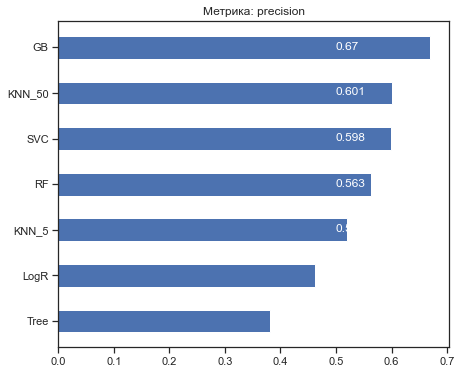

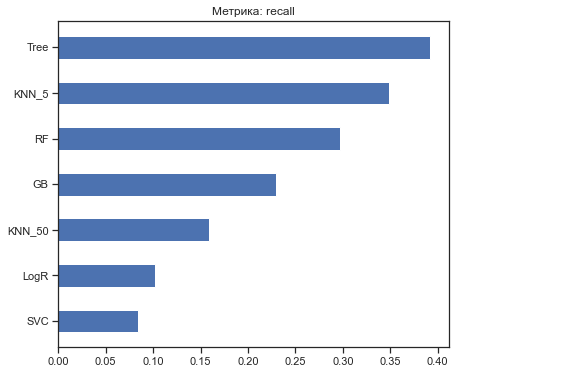

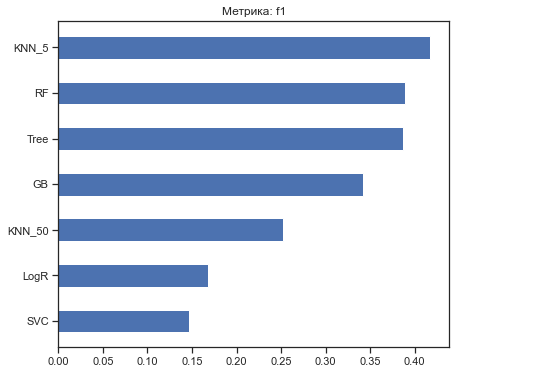

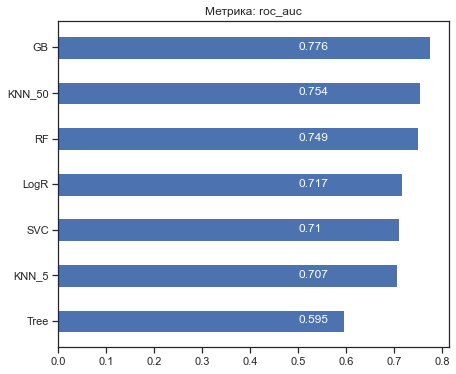

In [65]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

**Вывод: на основании двух метрик из четырех используемых, лучшей оказалась модель грудиентного бустинга.**